In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Tigers players

tigers_data = master_data.loc[master_data["Franchise"] == "Tigers"]

#Only showing players that signed with the Tigers

signed_tigers_data = tigers_data.loc[tigers_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_tigers_data.groupby("Year")

#Unsigned Tigers draft picks

unsigned_tigers_data = tigers_data.loc[tigers_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1976    63.2
1975    44.7
1998    34.1
2004    31.7
1974    29.9
2002    28.3
2005    26.3
1987    23.2
1986    22.6
1972    22.5
1985    22.4
1992    20.1
2007    18.7
1978    16.6
2010    15.3
1991    13.9
2008    13.9
1994    12.4
1993    12.1
1990    11.5
1999    10.4
1980     9.6
1984     9.2
2013     9.2
2001     7.6
2006     7.1
1996     6.2
2011     5.9
1989     5.9
1970     5.3
2012     4.8
1966     3.7
1995     3.6
1981     3.3
1969     3.2
1965     3.1
2000     3.1
1977     2.5
1988     2.3
2014     2.0
1979     1.7
1968     1.3
1983     0.9
1997     0.5
1982     0.5
2017     0.0
2016     0.0
2019     0.0
1973     0.0
2018     0.0
1967    -0.5
2015    -0.6
2003    -0.8
2009    -1.5
1971    -3.2
Name: Total_WAR, dtype: float64

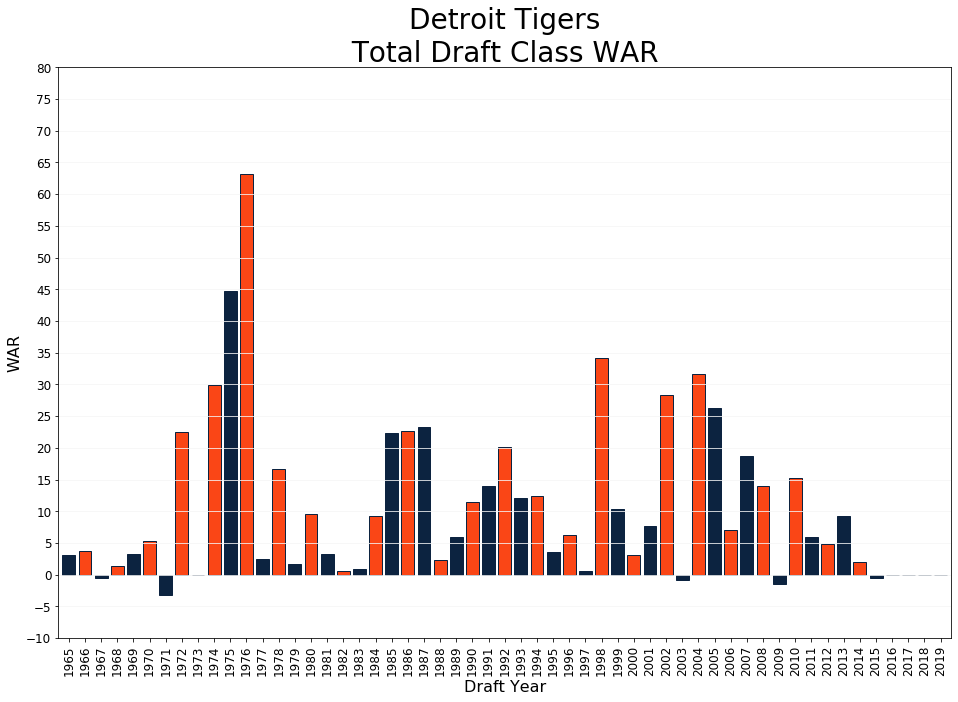

In [13]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#0C2340", "#FA4616"], width = .8, fontsize = 12, edgecolor = "#0C2340", figsize = (16, 10.5))
plt.title("Detroit Tigers\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Tigers WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_tigers_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
44197,2004,1,2,Tigers,Tigers,Y,Justin Verlander,2005.0,verlaju01,8700.0,-0.3,31.4,31.1,RHP,4Yr,Old Dominion University,Norfolk,VA,More than 25 WAR
41313,2002,3,80,Tigers,Tigers,Y,Curtis Granderson,2004.0,grandcu01,4747.0,24.1,0.0,24.1,OF,4Yr,University of Illinois at Chicago,Chicago,IL,20-25 WAR
17108,1985,22,574,Tigers,Tigers,Y,John Smoltz,1988.0,smoltjo01,115.0,1.3,22.0,23.3,RHP,HS,Waverly HS,Lansing,MI,20-25 WAR
35391,1998,1,14,Tigers,Tigers,Y,Jeff Weaver,1999.0,weaveje01,503.0,0.8,21.8,22.6,RHP,4Yr,California State University Fresno,Fresno,CA,20-25 WAR
8635,1975,5,99,Tigers,Tigers,Y,Lou Whitaker,1977.0,whitalo01,1013846.0,22.4,0.0,22.4,3B,HS,Martinsville HS,Martinsville,VA,20-25 WAR
8611,1975,4,75,Tigers,Tigers,Y,Jason Thompson,1976.0,thompja01,1013014.0,22.3,0.0,22.3,LHP,4Yr,California State University Northridge,Los Angeles,CA,20-25 WAR
7865,1974,1,16,Tigers,Tigers,Y,Lance Parrish,1977.0,parrila02,1010021.0,21.6,0.0,21.6,INF,HS,Walnut HS,Walnut,CA,20-25 WAR
18287,1987,1,30,Tigers,Tigers,Y,Travis Fryman,1990.0,frymatr01,385.0,21.6,0.0,21.6,SS,HS,Gonzalez Tate HS,Pensacola,FL,20-25 WAR
9241,1976,2,26,Tigers,Tigers,Y,Alan Trammell,1977.0,trammal01,1013157.0,19.7,0.0,19.7,SS,HS,Kearny HS,San Diego,CA,15-20 WAR
9313,1976,5,98,Tigers,Tigers,Y,Jack Morris,1977.0,morrija02,1009211.0,-0.1,19.2,19.1,RHP,4Yr,Brigham Young University,Provo,UT,15-20 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_tigers_data.loc[((signed_tigers_data["WAR Group"] == "Less than 5 WAR") |
(signed_tigers_data["WAR Group"] == "No Major League Experience")) & 
(signed_tigers_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
12,1965,1,13,Tigers,Tigers,Y,Gene Lamont,1970.0,lamonge01,1007281.0,0.2,0.0,0.2,C,HS,Hiawatha HS,Kirkland,IL,Less than 5 WAR
1669,1967,1,15,Tigers,Tigers,Y,Jim Foor,1971.0,foorji01,1004209.0,0.0,-0.4,-0.4,LHP,HS,McCluer HS,Florissant,MO,Less than 5 WAR
2647,1968,1,18,Tigers,Tigers,Y,Murray Robinson,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Thomas Dale HS,Chester,VA,No Major League Experience
3560,1969,1,19,Tigers,Tigers,Y,John Young,1971.0,youngjo01,1014382.0,0.1,0.0,0.1,1B,HS,Enterprise HS,Redding,CA,Less than 5 WAR
4603,1970,1,20,Tigers,Tigers,Y,Terry Mappin,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Durrett HS,Louisville,KY,No Major League Experience
5521,1971,1,11,Tigers,Tigers,Y,Tom Veryzer,1973.0,veryzto01,1013418.0,-2.0,0.0,-2.0,SS,HS,Islip HS,Islip,NY,Less than 5 WAR
6331,1972,1,20,Tigers,Tigers,Y,Jerry Manuel,1975.0,manueje01,1008086.0,-0.4,0.0,-0.4,SS,HS,Cordova HS,Rancho Cordova,CA,Less than 5 WAR
7121,1973,1,19,Tigers,Tigers,Y,Charles Bates,NaN,NaN,NaN,NaN,NaN,NaN,3B,4Yr,California State University Los Angeles,Los Angeles,CA,No Major League Experience
8539,1975,1,3,Tigers,Tigers,Y,Les Filkins,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Washington HS,Chicago,IL,No Major League Experience
9217,1976,1,2,Tigers,Tigers,Y,Pat Underwood,1979.0,underpa01,1013280.0,0.0,3.2,3.2,LHP,HS,Kokomo HS,Kokomo,IN,Less than 5 WAR


In [9]:
#Best unsigned draft picks in franchise history

unsigned_tigers_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
52,1965,3,53,Tigers,Tigers,N,Andy Messersmith,1968.0,messean01,1008799.0,2.0,24.5,26.5,RHP,4Yr,University of California Berkeley,Berkeley,CA,More than 25 WAR
9361,1976,7,146,Tigers,Tigers,N,Ozzie Smith,1978.0,smithoz01,1012186.0,19.7,0.0,19.7,SS,4Yr,California Polytechnic State University San Lu...,San Luis Obispo,CA,15-20 WAR
31823,1995,55,1456,Tigers,Tigers,N,Mark Mulder,2000.0,muldema01,932.0,0.4,19.1,19.5,1B,HS,Thornwood HS,South Holland,IL,15-20 WAR
26677,1992,41,1148,Tigers,Tigers,N,Mark Redman,1999.0,redmama01,491.0,-1.1,14.3,13.2,LHP,HS,Escondido HS,Escondido,CA,10-15 WAR
8971,1975,19,435,Tigers,Tigers,N,Bruce Berenyi,1980.0,berenbr01,1000864.0,0.7,12.1,12.8,RHP,JC,Glen Oaks Community College,Centreville,MI,10-15 WAR
27330,1993,14,389,Tigers,Tigers,N,Keith Foulke,1997.0,foulkke01,231.0,-0.1,11.5,11.4,RHP,JC,Galveston College,Galveston,TX,10-15 WAR
30802,1995,16,434,Tigers,Tigers,N,Mark Hendrickson,2002.0,hendrma01,1574.0,0.1,11.0,11.1,LHP,4Yr,Washington State University,Pullman,WA,10-15 WAR
46713,2005,34,1020,Tigers,Tigers,N,Alex Avila,2009.0,avilaal01,7476.0,10.2,0.0,10.2,3B,HS,Archbishop McCarthy HS,Southwest Ranches,FL,10-15 WAR
2802,1968,8,174,Tigers,Tigers,N,Ross Grimsley,1971.0,grimsro02,1005071.0,-1.4,11.0,9.6,LHP,HS,Frayser HS,Memphis,TN,5-10 WAR
49937,2007,41,1241,Tigers,Tigers,N,DJ LeMahieu,2011.0,lemahdj01,9874.0,9.1,0.0,9.1,3B,HS,Brother Rice HS,Bloomfield Hills,MI,5-10 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_tigers_data.loc[signed_tigers_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
17108,1985,22,574,Tigers,Tigers,Y,John Smoltz,1988.0,smoltjo01,115.0,1.3,22.0,23.3,RHP,HS,Waverly HS,Lansing,MI,20-25 WAR
17855,1986,19,489,Tigers,Tigers,Y,Chris Hoiles,1989.0,hoilech01,1005935.0,18.6,0.0,18.6,C,4Yr,Eastern Michigan University,Ypsilanti,MI,15-20 WAR
25865,1992,12,336,Tigers,Tigers,Y,Bobby Higginson,1995.0,higgibo02,469.0,16.7,0.0,16.7,OF,4Yr,Temple University,Philadelphia,PA,15-20 WAR
46053,2005,12,360,Tigers,Tigers,Y,Matthew Joyce,2008.0,joycema01,3353.0,12.3,0.0,12.3,OF,4Yr,Florida Southern College,Lakeland,FL,10-15 WAR
6715,1972,17,404,Tigers,Tigers,Y,Vern Ruhle,1974.0,ruhleve01,1011297.0,0.3,8.7,9.0,RHP,4Yr,Olivet College,Olivet,MI,5-10 WAR
29442,1994,28,781,Tigers,Tigers,Y,Dave Roberts,1999.0,roberda07,670.0,7.3,0.0,7.3,OF,4Yr,University of California Los Angeles,Los Angeles,CA,5-10 WAR
6691,1972,16,380,Tigers,Tigers,Y,Dave Lemanczyk,1973.0,lemanda01,1007511.0,0.0,6.8,6.8,RHP,4Yr,Hartwick College,Oneonta,NY,5-10 WAR
21452,1989,19,499,Tigers,Tigers,Y,John Doherty,1992.0,doherjo02,1003358.0,0.0,5.7,5.7,RHP,4Yr,Concordia College,Bronxville,NY,5-10 WAR
57803,2013,11,336,Tigers,Tigers,Y,Chad Green,2016.0,greench03,15552.0,-0.1,5.7,5.6,RHP,4Yr,University of Louisville,Louisville,KY,5-10 WAR
56653,2012,13,424,Tigers,Tigers,Y,Devon Travis,2015.0,travide01,13862.0,4.8,0.0,4.8,2B,4Yr,Florida State University,Tallahassee,FL,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(tigers_data["Year"], tigers_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,34.9,60.5,4.7
1966,22.2,75.0,2.8
1967,9.8,88.2,2.0
1968,15.6,82.2,2.2
1969,27.3,72.7,0.0
1970,32.4,61.8,5.9
1971,16.2,81.1,2.7
1972,36.4,60.6,3.0
1973,33.3,66.7,0.0


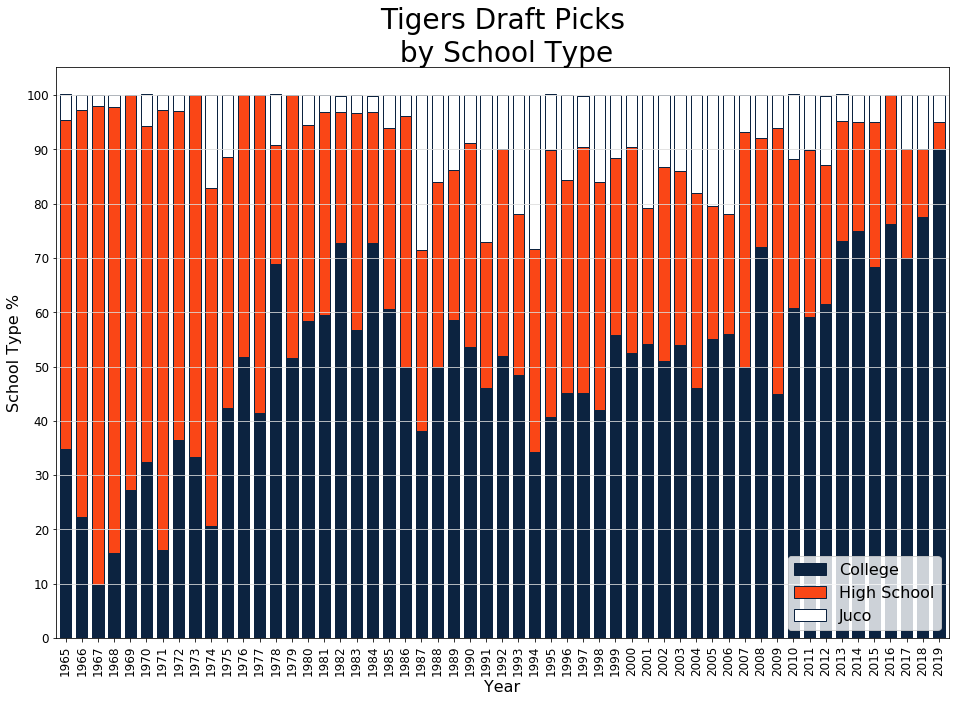

In [14]:
#Bar chart of table above

colors = ["#0C2340", "#FA4616", "white"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#0C2340", stacked = True, figsize = (16, 10.5))
plt.title("Tigers Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Tigers Draft Picks by School Type.png")
plt.show()